# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

Use Command Below to install dependencies:

pip install swig

pip install box2d

pip install pygame

### 1. Import the Necessary Packages

In [1]:
!pip --quiet install swig box2d pygame gym

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [3]:
env = gym.make('LunarLander-v2')
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


First Try to understand the code in **Step 2** and **Step 3** of this notebook, along with the code in `Deep_Q_N.py` and `model.py`.  Once you have an understanding of how the different files work together, 
- Define your own deep Q-network in `model.py` that maps states to action values. You might need to introduce new variables.
- Finish the `learn` method in the `Agent` class in `Deep_Q_N.py`.  The sampled batch of experience tuples is already provided for you; you need only use the local and target Q-networks to compute the loss, before taking a step towards minimizing the loss.

Once you have completed the code in `Deep_Q_N.py` and `model.py`, run the code cell below.

In [4]:
from Deep_Q_N import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state = env.reset(seed=0)[0]
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _, _ = env.step(action)
    if done:
        break 
        


/home/soltani/anaconda3/lib/python3.9/site-packages/gym/envs/box2d/lunar_lander.py:604: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("LunarLander-v2", render_mode="rgb_array")
  gym.logger.warn(


### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  Amend the supplied values to get a better performence.

Episode 100	Average Score: -157.02
Episode 200	Average Score: -116.12
Episode 300	Average Score: -49.200
Episode 400	Average Score: 50.227
Episode 500	Average Score: 128.94
Episode 600	Average Score: 182.22
Episode 631	Average Score: 201.39
Environment solved in 531 episodes!	Average Score: 201.39


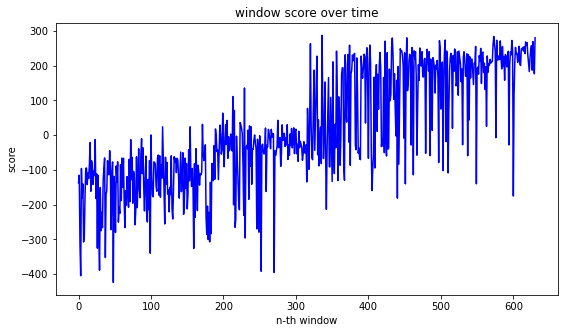

In [5]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
# Your Code Here
plt.figure(figsize=(9, 5))
plt.plot(scores, 'b-')
plt.title('window score over time')
plt.xlabel('n-th window')
plt.ylabel('score')
plt.plot()
plt.show()